## <center> LGMVIP_DS_ September_23_Task_Number_3-1 <center>
## <center> Neural Network That Can Read Hand Writing <center>
## <center> By K. Pavan Kumar <center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
      #  print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from PIL import Image
from collections import Counter
import math

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Train Test Splitting MNIST Data

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("The Shape of Training Dataset is: ",X_train.shape)
print('The Shape of Test Dataset is: ',X_test.shape)

The Shape of Training Dataset is:  (60000, 28, 28)
The Shape of Test Dataset is:  (10000, 28, 28)


Text(0.5, 1.0, 'Letter or Number 5')

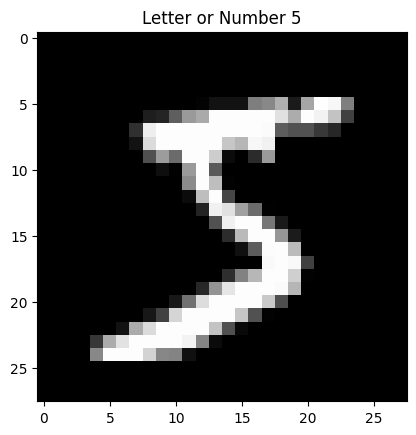

In [5]:
plt.imshow(X_train[0],cmap='gray')
plt.title('Letter or Number '+str(y_train[0]))

In [6]:
image_size=[]
for i in range(len(X_train)):
    image_size.append(X_train[i].size)

In [7]:
print('The size of Image is: ',(math.sqrt(X_train[0].size),math.sqrt(X_train[0].size)))

The size of Image is:  (28.0, 28.0)


In [8]:
image_width=28
image_height=28
batch_size=128
class_num=10
epochs=20
input_shape=(image_width,image_height,1)

## Image Preprocessing

In [9]:
# Reshaping X_train, X_test
X_train=X_train.reshape(X_train.shape[0],image_width,image_height,1)
X_test=X_test.reshape(X_test.shape[0],image_width,image_height,1)

In [10]:
print("The shape of X_train after reshaping is: ",X_train.shape)
print("The shape of X_test after reshaping is: ",X_test.shape)

The shape of X_train after reshaping is:  (60000, 28, 28, 1)
The shape of X_test after reshaping is:  (10000, 28, 28, 1)


In [11]:
# Reshaping y_train and y_test
y_train=tf.keras.utils.to_categorical(y_train,class_num)
y_test=tf.keras.utils.to_categorical(y_test,class_num)

In [12]:
print("The shape of y_train after reshaping is: ",y_train.shape)
print("The shape of y_test after reshaping is: ",y_test.shape)

The shape of y_train after reshaping is:  (60000, 10)
The shape of y_test after reshaping is:  (10000, 10)


In [13]:
# Normalizing X_train and X_test
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

## Model Building

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_num,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20


2023-09-28 21:26:40.770408: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 19s 10ms/step - loss: 0.2532 - accuracy: 0.9221 - val_loss: 0.0503 - val_accuracy: 0.9838
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0881 - accuracy: 0.9745 - val_loss: 0.0390 - val_accuracy: 0.9868
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0324 - val_accuracy: 0.9889
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0273 - val_accuracy: 0.9921
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0287 - val_accuracy: 0.9918
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0297 - val_accuracy: 0.9916
Epoch 8/20
469/

## Model Performance on Test Dataset

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9926


[0.03396006301045418, 0.9926000237464905]